In [3]:
#Varsha Salil
#11608680

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


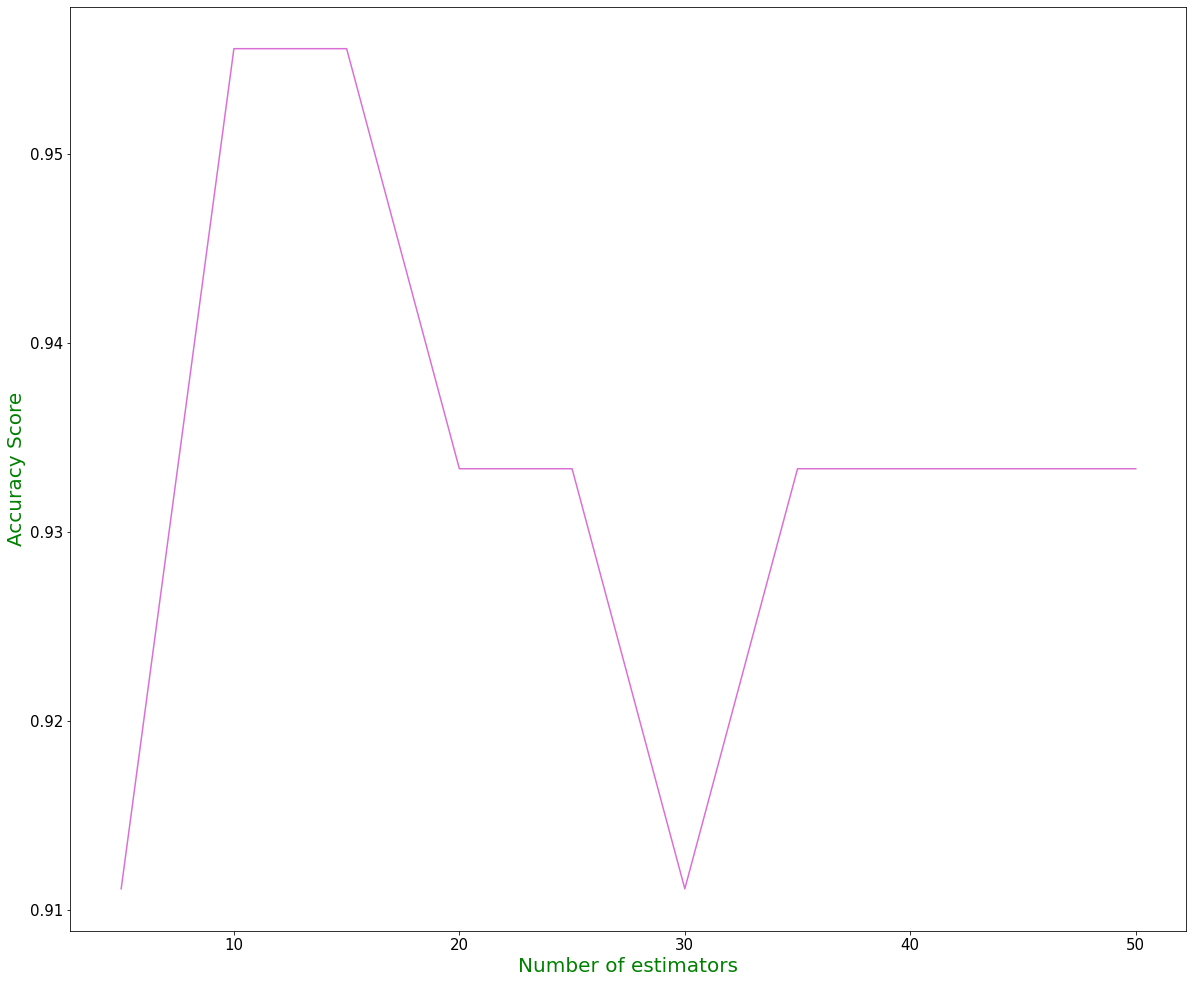

In [27]:
from sklearn.ensemble import BaggingClassifier

import matplotlib.pyplot as plt 

from sklearn import datasets

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

data = datasets.load_wine(as_frame = True)

inp = data.data

out = data.target

inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = 0.25, random_state = 22)

estimator = [5,10,15,20,25,30,35,40,45,50] 

models = [] 

scores = [] 
 
for n in estimator: 
    
    c = BaggingClassifier(n_estimators  = n,  random_state = 22) 
    
    c.fit(inp_train, out_train) 
    
    models.append(c) 
    
    scores.append(accuracy_score(y_true = out_test, y_pred = c.predict(inp_test))) 

plt.figure(figsize=(20,17)) 

plt.plot(estimator, scores,'orchid') 
  
plt.xlabel("Number of estimators", fontsize = 20, color='green') 

plt.ylabel("Accuracy Score", fontsize = 20, color='green') 

plt.tick_params(labelsize = 15) 
  
plt.show()  

In [28]:
from sklearn.tree import DecisionTreeClassifier

import xgboost

from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

bc.fit(inp_train, out_train)

out_pred = bc.predict(inp_test)

acc = accuracy_score(out_test, out_pred)

acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, Bagging accuracy: {:.3f}'.format(acc, acc_oob))

Test set accuracy: 0.867, Bagging accuracy: 0.902


In [29]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(inp_train, out_train)

score = adaboost.score(inp_test, out_test)

print('Adaboost Score:')

print(score)

Adaboost Score:
0.8222222222222222


In [30]:
from sklearn.ensemble import GradientBoostingClassifier 

inp_train, inp_val, out_train, out_val = train_test_split(inp_train, out_train,  
    test_size=.30, random_state=12)

lr = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr:
    
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    
    gb.fit(inp_train, out_train)

    print("Learning rate: ", learning_rate)
    
    print("Accuracy score (training): {0:.3f}".format(gb.score(inp_train, out_train)))
    
    print("Accuracy score (validation): {0:.3f}".format(gb.score(inp_val, out_val)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.950
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.975
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.975
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.975
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.975
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.975
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.950


In [31]:
gb2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)

gb2.fit(inp_train, out_train)

pred = gb2.predict(inp_val)

outpred=gb2.predict(inp_test)

In [32]:
from sklearn.metrics import mean_squared_error

ms=mean_squared_error(out_test,outpred)

print('Mean Squared Error:')

print(ms)



Mean Squared Error:
0.022222222222222223


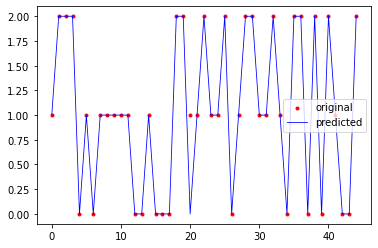

In [33]:
inp_ax=range(len(out_test))

plt.scatter(inp_ax,out_test,s=9,color='red',label='original')

plt.plot(inp_ax,outpred,lw=0.8,color='blue',label='predicted')

plt.legend()

plt.show()